TODO

- gitignore my toggle data. Not everyone needs to know how I spend my time. 
- Add workout, weight, work, social to this. Extract monthly gym time (already calculated) and combine with workout sum in monthly preprocessing. For weight maybe go on toggle and manually add all my weights? or add separate weight csv. For work can figure out later Add separate csvs for sub-oct 2022 data (old track). Monthly aggreggates only but also include workout time and weight. So that's how ill import my old data. 
- Monthly Preprocessing: Extract last n months to visualise (define parameter)
- Concatenate different years
- Add lineplots/scatterplots in addition to barplots
- 


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import datetime

In [2]:
df = pd.read_csv('Toggl_time_entries_2022-10-01_to_2022-10-01.csv')
df

,User,Email,Client,Project,Task,Description,Billable,Start date,Start time,End date,End time,Duration,Tags,Amount ()
0,Johnspinkles,johnspinkles@gmail.com,NaN,To-Do,NaN,*,No,2022-10-01,09:21:41,2022-10-01,09:22:24,00:00:43,NaN,NaN
1,Johnspinkles,johnspinkles@gmail.com,NaN,Weight,NaN,70.3,No,2022-10-01,09:22:27,2022-10-01,09:22:44,00:00:17,NaN,NaN
2,Johnspinkles,johnspinkles@gmail.com,NaN,To-Do,NaN,*,No,2022-10-01,09:29:49,2022-10-01,09:40:39,00:10:50,NaN,NaN
3,Johnspinkles,johnspinkles@gmail.com,NaN,To-Do,NaN,Jobs,No,2022-10-01,09:36:47,2022-10-01,09:49:09,00:12:22,NaN,NaN
4,Johnspinkles,johnspinkles@gmail.com,NaN,To-Do,NaN,Jobs,No,2022-10-01,10:38:51,2022-10-01,11:21:53,00:43:02,NaN,NaN
5,Johnspinkles,johnspinkles@gmail.com,NaN,To-Do,NaN,*,No,2022-10-01,11:31:30,2022-10-01,11:40:32,00:09:02,NaN,NaN
6,Johnspinkles,johnspinkles@gmail.com,NaN,To-Do,NaN,*,No,2022-10-01,11:55:05,2022-10-01,11:55:13,00:00:08,NaN,NaN
7,Johnspinkles,johnspinkles@gmail.com,NaN,To-Do,NaN,Jobs,No,2022-10-01,11:55:15,2022-10-01,12:08:53,00:13:38,NaN,NaN
8,Johnspinkles,johnspinkles@gmail.com,NaN,To-Do,NaN,Jobs,No,2022-10-01,12:24:43,2022-10-01,12:25:58,00:01:15,NaN,NaN
9,Johnspinkles,johnspinkles@gmail.com,NaN,To-Do,NaN,Jobs,No,2022-10-01,12:31:17,2022-10-01,12:46:18,00:15:01,NaN,NaN


### 🔴 Initial Preprocessing

In [3]:
# Drop redundant fields
df = df.drop(['User', 'Email', 'Client', 'Billable', 'Amount ()'], axis=1)

# Convert duration string to hours (float)
df['Duration']=pd.to_timedelta(df['Duration']).astype('timedelta64[s]').astype(int) / 3600
df = df.rename(columns={'Duration': 'Duration (hrs)'})

# Combine date
df['Start'] = pd.to_datetime(df['Start date'] + ' ' + df['Start time'], yearfirst=True)
df['End'] = pd.to_datetime(df['End date'] + ' ' + df['End time'], yearfirst=True)

# Drop nans in project. Uncomment these lines to explore nans
# print('NANs in PROJECT: ')
# display(df[df.Project.isna()])
df = df[df.Project.notna()]

# TODO: Remove this after testing and when you have more data. Removes out old projects
#df = df[(df.Project != 'Applied Data Science') & (df.Project != 'Statistics for Data Science') & (df.Project != 'Machine Learning 1') & (df.Project != 'MSc Project') & (df.Project != 'ML2') & (df.Project != 'BML') & (df.Project != 'Reinforcement Learning')]
df['Project'].replace('Applied Data Science', 'Data Science', inplace=True)
df['Project'].replace('Statistics for Data Science', 'Data Science', inplace=True)
df['Project'].replace('Machine Learning 1', 'Data Science', inplace=True)
df['Project'].replace('MSc Project', 'Data Science', inplace=True)
df['Project'].replace('ML2', 'Data Science', inplace=True)
df['Project'].replace('BML', 'Data Science', inplace=True)
df['Project'].replace('Reinforcement Learning', 'Data Science', inplace=True)


df

,Project,Task,Description,Start date,Start time,End date,End time,Duration (hrs),Tags,Start,End
0,To-Do,NaN,*,2022-10-01,09:21:41,2022-10-01,09:22:24,0.011944,NaN,2022-10-01 09:21:41,2022-10-01 09:22:24
1,Weight,NaN,70.3,2022-10-01,09:22:27,2022-10-01,09:22:44,0.004722,NaN,2022-10-01 09:22:27,2022-10-01 09:22:44
2,To-Do,NaN,*,2022-10-01,09:29:49,2022-10-01,09:40:39,0.180556,NaN,2022-10-01 09:29:49,2022-10-01 09:40:39
3,To-Do,NaN,Jobs,2022-10-01,09:36:47,2022-10-01,09:49:09,0.206111,NaN,2022-10-01 09:36:47,2022-10-01 09:49:09
4,To-Do,NaN,Jobs,2022-10-01,10:38:51,2022-10-01,11:21:53,0.717222,NaN,2022-10-01 10:38:51,2022-10-01 11:21:53
5,To-Do,NaN,*,2022-10-01,11:31:30,2022-10-01,11:40:32,0.150556,NaN,2022-10-01 11:31:30,2022-10-01 11:40:32
6,To-Do,NaN,*,2022-10-01,11:55:05,2022-10-01,11:55:13,0.002222,NaN,2022-10-01 11:55:05,2022-10-01 11:55:13
7,To-Do,NaN,Jobs,2022-10-01,11:55:15,2022-10-01,12:08:53,0.227222,NaN,2022-10-01 11:55:15,2022-10-01 12:08:53
8,To-Do,NaN,Jobs,2022-10-01,12:24:43,2022-10-01,12:25:58,0.020833,NaN,2022-10-01 12:24:43,2022-10-01 12:25:58
9,To-Do,NaN,Jobs,2022-10-01,12:31:17,2022-10-01,12:46:18,0.250278,NaN,2022-10-01 12:31:17,2022-10-01 12:46:18


In [4]:
print('Unique Projects: ')
for i in range(df.Project.unique().shape[0]):
    print('-', df.Project.unique()[i])

Unique Projects: 
- To-Do
- Weight
- Data Science


### 🔴 Monthly Preprocessing

#### NEW DATA
Oct 2022 - Present

In [5]:
# NEW DATA: Oct 2022 - Present
df_monthly = df.copy()
df_monthly = df_monthly.rename(columns={'Start': 'Date'})
df_monthly = df_monthly.groupby([df_monthly['Date'].dt.to_period('M'), 'Project']).sum()
df_monthly = df_monthly.reset_index()
df_monthly = df_monthly.drop(['Task', 'Tags'], axis=1)
df_monthly['Date'] = df_monthly['Date'].dt.strftime('%b %y')
weight = df_monthly[df_monthly.Project == 'Weight']
df_monthly = df_monthly[df_monthly.Project != 'Weight']

# OLD DATA: January 2019 - Sept 2022
old_data=pd.read_csv('old_data.csv')
old_data['Date'] = pd.to_datetime(old_data['Date'], dayfirst=True)
old_data['Date'] = old_data['Date'].dt.strftime('%b %y')
old_data = old_data.rename(columns={'Duration': 'Duration (hrs)'})
old_weight = old_data[old_data.Project == 'Weight']    # extract weight
old_data = old_data[old_data.Project != 'Weight']
old_data['Duration (hrs)'] = old_data['Duration (hrs)'] / 2    # CGP to hrs
#old_data.drop(old_data[old_data['Duration (hrs)'] == 0.].index)

# COMBINE
df_monthly = pd.concat([old_data, df_monthly])
weight = pd.concat([old_weight, weight])
df_monthly.reset_index(inplace=True)
df_monthly = df_monthly.drop('index', axis=1)
# drop projects with 0 duration (where no work was done on that month. automatically defaults to 0 in visualisation)
#df_monthly.drop(df_monthly[df_monthly['Duration (hrs)'] == 0.].index)

df_monthly

,Date,Project,Duration (hrs)
0,Jan 19,University,70.000000
1,Jan 19,Notes,11.000000
2,Jan 19,Data Science,0.000000
3,Jan 19,To-Do,44.000000
4,Jan 19,Piano,9.000000
...,...,...,...
267,Sep 22,To-Do,78.500000
268,Sep 22,Piano,0.000000
269,Sep 22,Workout,2.000000
270,Oct 22,Data Science,0.983889


### 🔴 Monthly Breakdown (Total - Academic - Other)
**Academic**
- Notes
- Data Science

**Other**
- To-Do
- Piano
- Workout

In [6]:
df_monthly_acad_other = df_monthly.copy()
df_monthly_acad_other['Project'].replace('Data Science', 'Academic', inplace=True)
df_monthly_acad_other['Project'].replace('Notes', 'Academic', inplace=True)
df_monthly_acad_other['Project'].replace('University', 'Academic', inplace=True)
df_monthly_acad_other['Project'].replace('To-Do', 'Other', inplace=True)
df_monthly_acad_other['Project'].replace('Piano', 'Other', inplace=True)
df_monthly_acad_other['Project'].replace('Workout', 'Other', inplace=True)
df_monthly_acad_other = df_monthly_acad_other.groupby(['Date', 'Project'], sort=False, as_index=False).sum()

# All
df_monthly_total = df_monthly.copy()
for project in df_monthly_total.Project.unique():
    df_monthly_total['Project'].replace(project, 'All', inplace=True)
df_monthly_total = df_monthly_total.groupby('Date', sort=False).sum()
df_monthly_total.reset_index(inplace=True)

In [7]:
# for style in plt.style.available:
#     print(style)
#     plt.figure(figsize=(20,10))
#     plt.style.use(style) 

#     ax = sns.barplot(x='Project', y='Duration (hrs)', data=df_monthly_acad_other, hue='Date', ci=None, palette = 'rocket_r')
#     plt.legend([],[], frameon=False)
#     plt.show()

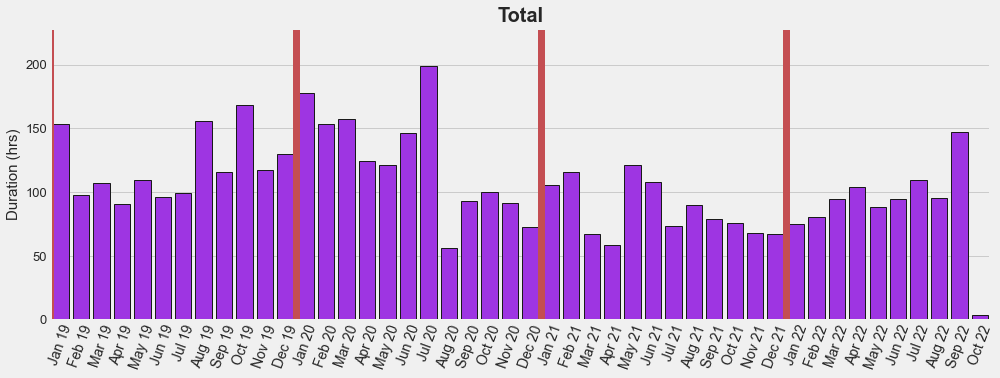

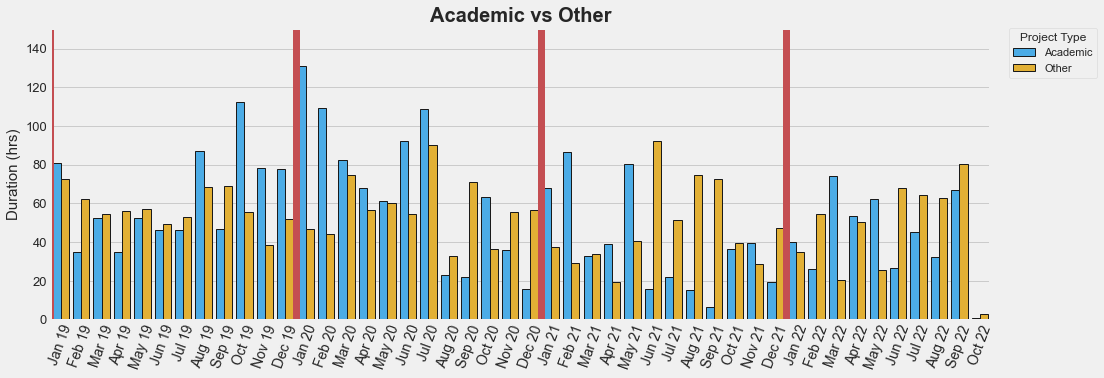

C:\Users\johng\AppData\Local\Temp\ipykernel_14744\1298943532.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


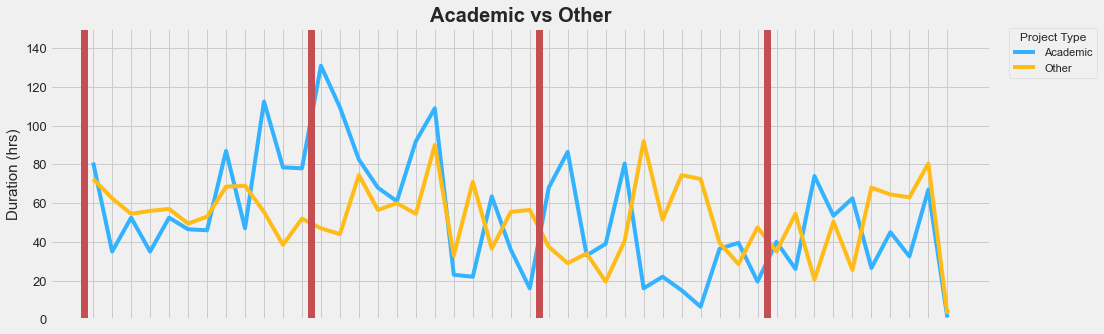

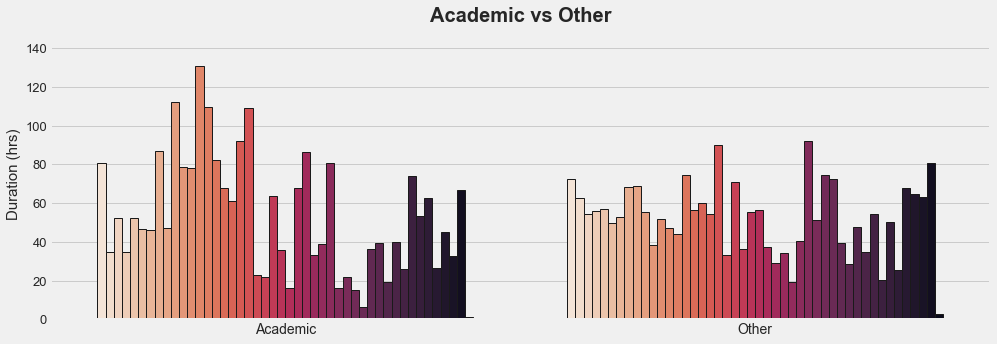

In [63]:
figsize=(15,5)
legendsize=10
title_size=20
title='Total'
bar_label_size=17
x_tick_size = 14
y_tick_size = 13

plt.style.use('fivethirtyeight') 
plt.figure(figsize=figsize)
y_lim = df_monthly_total['Duration (hrs)'].max() + df_monthly_total['Duration (hrs)'].max() * 0.15


# Set your custom color palette https://htmlcolorcodes.com/

colors = {'Other': "#FFBC18", 
          'Academic': "#33B2FF"}
hue_order = ['Academic', 'Other']


ax = sns.barplot(x='Date', y='Duration (hrs)', data=df_monthly_total, color='#A418FF', ci=None, linewidth=1, edgecolor="k")
plt.xlabel('')
plt.ylabel('Duration (hrs)', fontsize=15)
plt.title(title, fontsize=title_size, fontweight='bold')
plt.ylim([0, y_lim])                                                    # Expand y axis range for visibility
ax.xaxis.set_tick_params(labelsize=x_tick_size)                         # Enlarge x ticks
ax.yaxis.set_tick_params(labelsize=y_tick_size)                         # Enlarge x ticks
#ax.bar_label(ax.containers[0], fontsize=bar_label_size, fmt='%.0f', fontweight='bold') # Show values above bars
ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
line_locs = [count for count, value in enumerate(df_monthly_acad_other.Date) if value.startswith('Jan')]
for loc in line_locs:
    plt.axvline(x = loc//2-0.5, color = 'r', label = 'Year', linewidth=7, )
plt.show()













title='Academic vs Other'


y_lim = df_monthly_acad_other['Duration (hrs)'].max() + df_monthly_acad_other['Duration (hrs)'].max() * 0.15

plt.style.use('fivethirtyeight') 
plt.figure(figsize=figsize)

# Set your custom color palette https://htmlcolorcodes.com/

colors = {'Other': "#FFBC18", 
          'Academic': "#33B2FF"}
hue_order = ['Academic', 'Other']


ax = sns.barplot(x='Date', y='Duration (hrs)', data=df_monthly_acad_other, hue='Project', ci=None, palette=colors, hue_order=hue_order, linewidth=1, edgecolor="k")
plt.xlabel('')
plt.ylabel('Duration (hrs)', fontsize=15)
plt.title(title, fontsize=title_size, fontweight='bold')
plt.ylim([0, y_lim])                                                    # Expand y axis range for visibility
ax.xaxis.set_tick_params(labelsize=x_tick_size)                         # Enlarge x ticks
ax.yaxis.set_tick_params(labelsize=y_tick_size)                         # Enlarge x ticks
#ax.bar_label(ax.containers[0], fontsize=bar_label_size, fmt='%.0f', fontweight='bold') # Show values above bars
ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
plt.legend(title = 'Project Type', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
line_locs = [count for count, value in enumerate(df_monthly_acad_other.Date) if value.startswith('Jan')]
for loc in line_locs:
    plt.axvline(x = loc//2-0.5, color = 'r', label = 'Year', linewidth=7)
plt.show()






title='Academic vs Other'


y_lim = df_monthly_acad_other['Duration (hrs)'].max() + df_monthly_acad_other['Duration (hrs)'].max() * 0.15

plt.style.use('fivethirtyeight') 
plt.figure(figsize=figsize)

# Set your custom color palette https://htmlcolorcodes.com/

colors = {'Other': "#FFBC18", 
          'Academic': "#33B2FF"}
hue_order = ['Academic', 'Other']


ax = sns.lineplot(x='Date', y='Duration (hrs)', data=df_monthly_acad_other, hue='Project', ci=None, palette=colors, hue_order=hue_order)
plt.xlabel('')
plt.ylabel('Duration (hrs)', fontsize=15)
plt.title(title, fontsize=title_size, fontweight='bold')
plt.ylim([0, y_lim])                                                    # Expand y axis range for visibility
ax.xaxis.set_tick_params(labelsize=x_tick_size)                         # Enlarge x ticks
ax.yaxis.set_tick_params(labelsize=y_tick_size)                         # Enlarge x ticks
#ax.bar_label(ax.containers[0], fontsize=bar_label_size, fmt='%.0f', fontweight='bold') # Show values above bars
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.legend(title = 'Project Type', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
line_locs = [count for count, value in enumerate(df_monthly_acad_other.Date) if value.startswith('Jan')]
for loc in line_locs:
    plt.axvline(x = loc//2-0.5, color = 'r', label = 'Year', linewidth=7)
plt.show()













title='Academic vs Other'
sns.set_palette(sns.color_palette("rocket_r"))
#sns.set_palette(sns.dark_palette("#69d", reverse=True, as_cmap=True))

y_lim = df_monthly_acad_other['Duration (hrs)'].max() + df_monthly_acad_other['Duration (hrs)'].max() * 0.15

plt.style.use('fivethirtyeight') 
plt.figure(figsize=figsize)

# Set your custom color palette https://htmlcolorcodes.com/

colors = {'Other': "#FFBC18", 'Academic': "#33B2FF"}


ax = sns.barplot(x='Project', y='Duration (hrs)', data=df_monthly_acad_other, hue='Date', ci=None, palette = 'rocket_r', linewidth=1, edgecolor="k")
plt.xlabel('')
plt.ylabel('Duration (hrs)', fontsize=15)
plt.title(title, fontsize=title_size, fontweight='bold')
plt.ylim([0, y_lim])                                                    # Expand y axis range for visibility
ax.xaxis.set_tick_params(labelsize=x_tick_size)                         # Enlarge x ticks
ax.yaxis.set_tick_params(labelsize=y_tick_size)                         # Enlarge x ticks
#ax.bar_label(ax.containers[0], fontsize=bar_label_size, fmt='%.0f', fontweight='bold') # Show values above bars
plt.legend([],[], frameon=False)

plt.show()

In [33]:
line_locs = [count for count, value in enumerate(df_monthly_acad_other.Date) if value.startswith('Jan')]
line_locs

[0, 1, 24, 25, 48, 49, 72, 73]

In [31]:
for count, value in enumerate(df_monthly_acad_other.Date):
    if value.startswith('Jan')
    

""
0
1
2
3
4
...
87
88
89
90


In [30]:
df_monthly_acad_other[df_monthly_acad_other.Date[:3] == 'Jan']

C:\Users\johng\AppData\Local\Temp\ipykernel_14744\109368655.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_monthly_acad_other[df_monthly_acad_other.Date[:3] == 'Jan']


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

## TODO: Subplot these

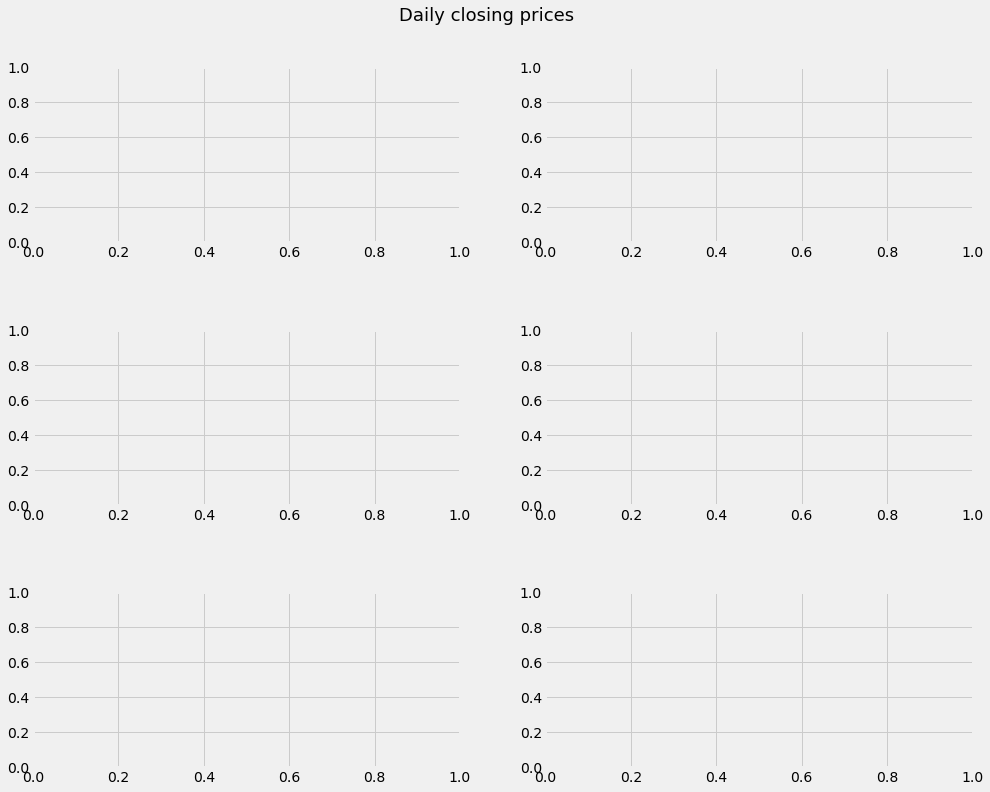

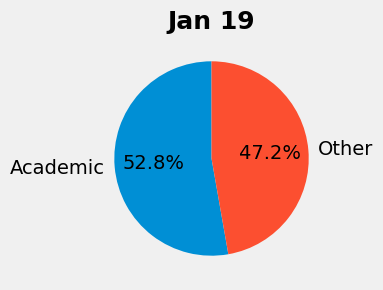

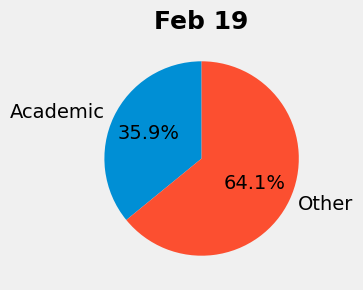

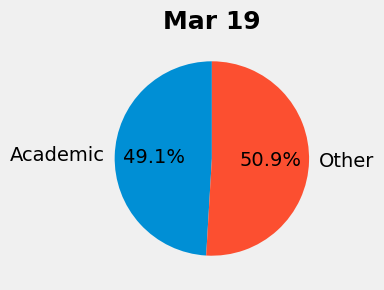

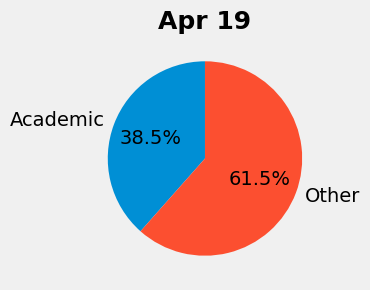

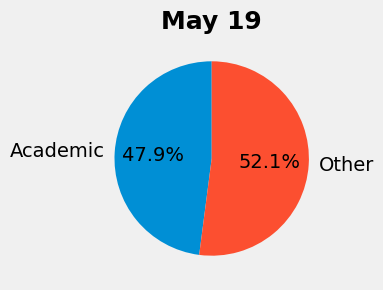

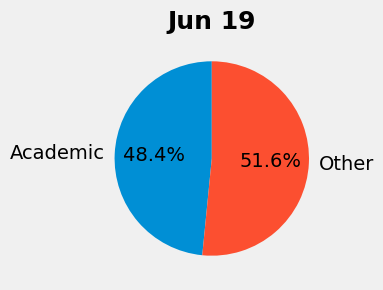

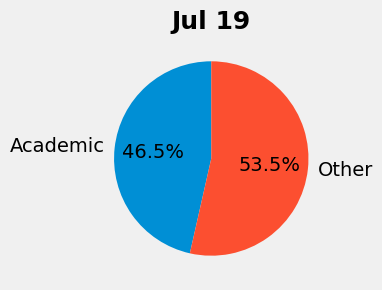

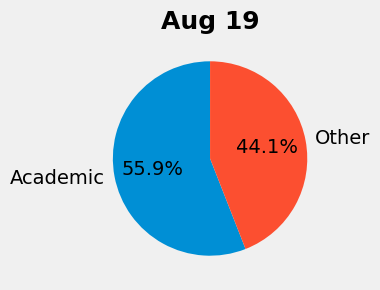

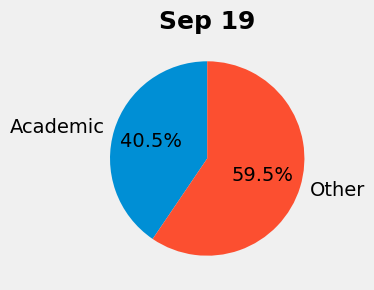

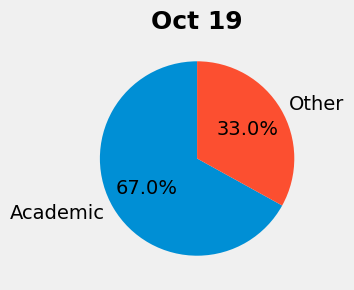

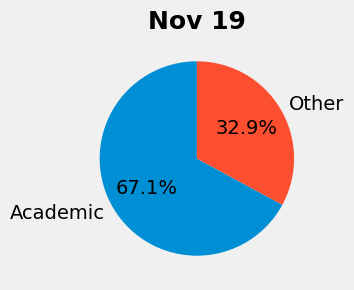

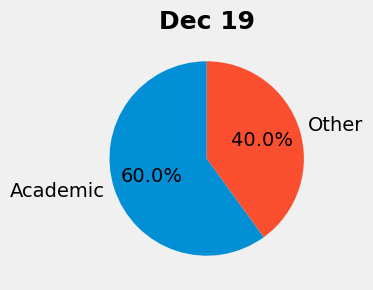

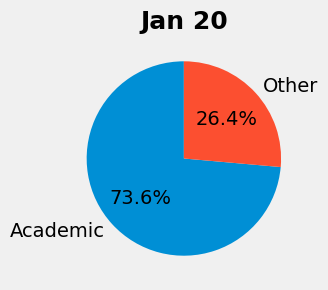

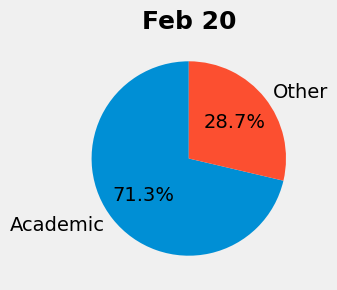

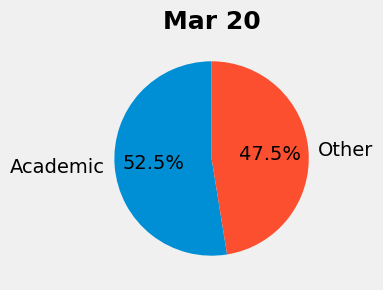

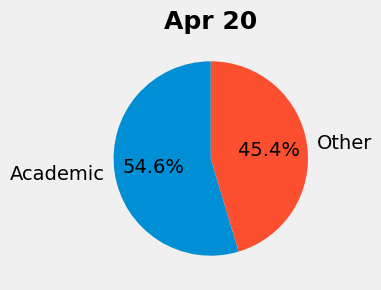

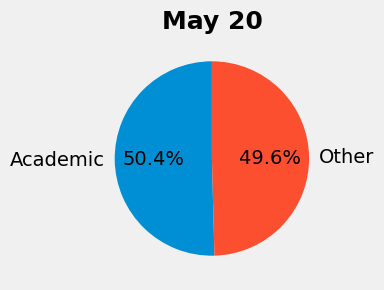

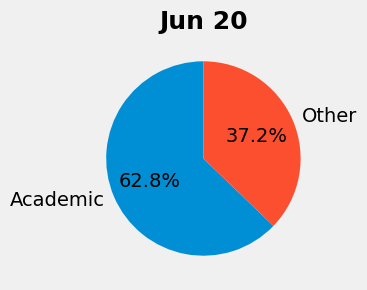

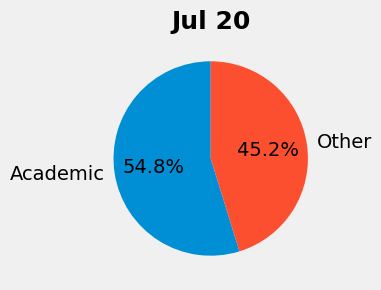

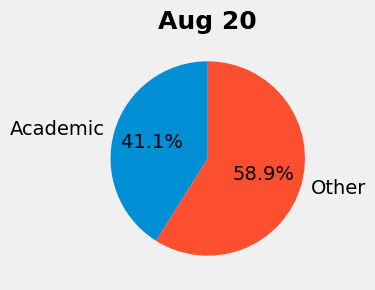

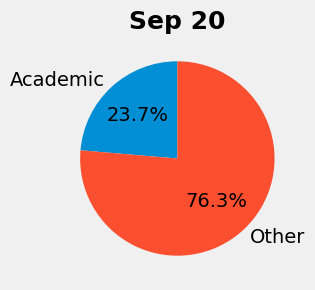

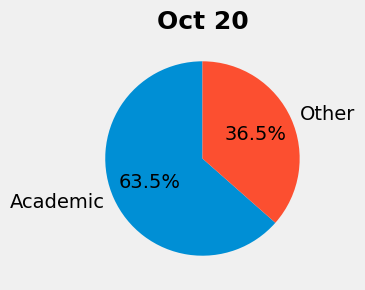

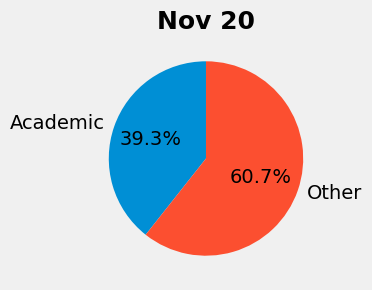

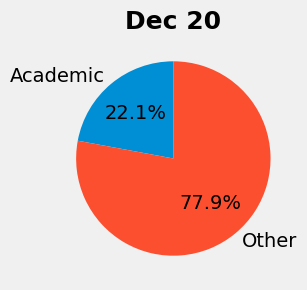

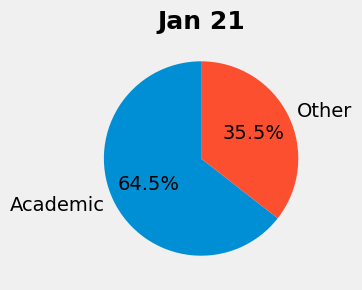

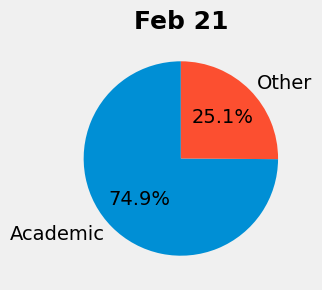

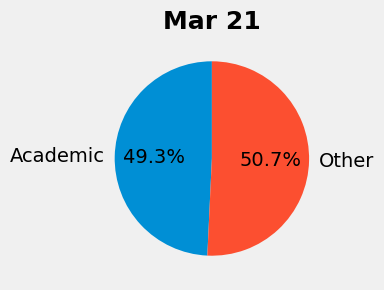

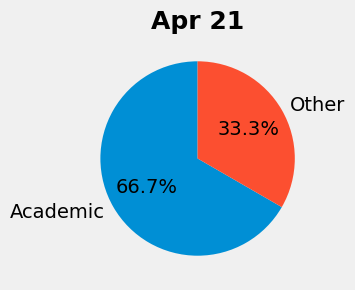

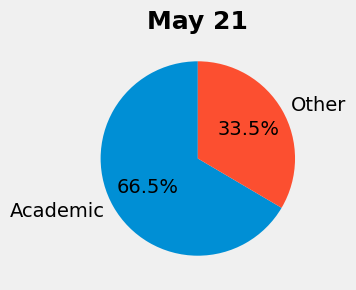

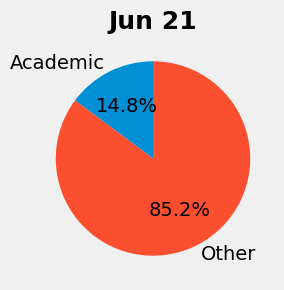

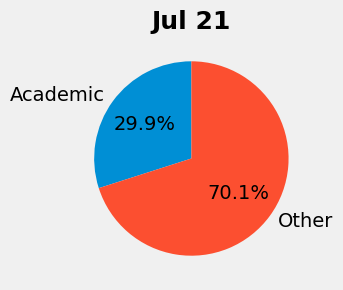

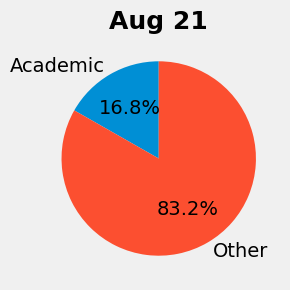

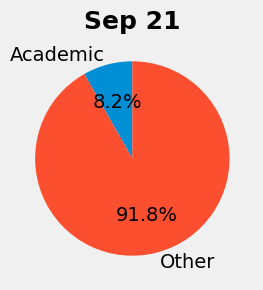

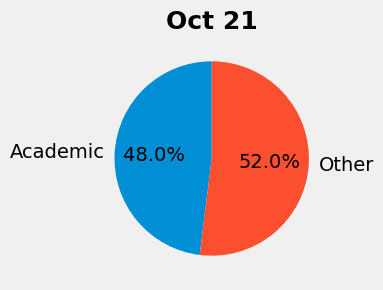

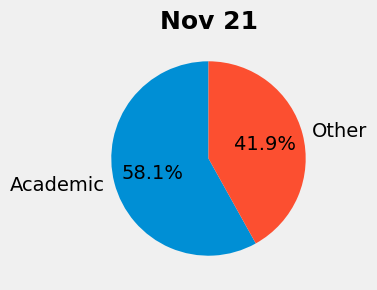

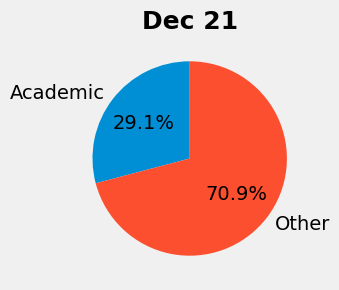

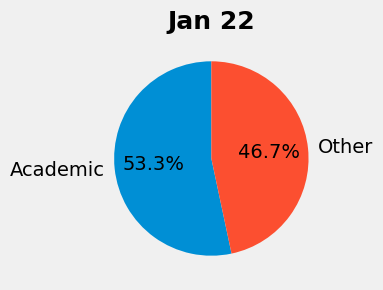

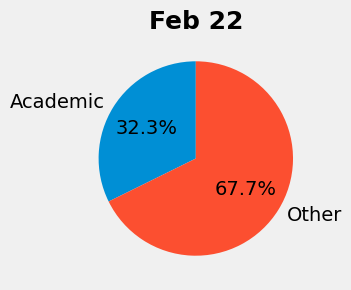

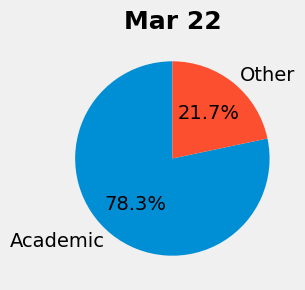

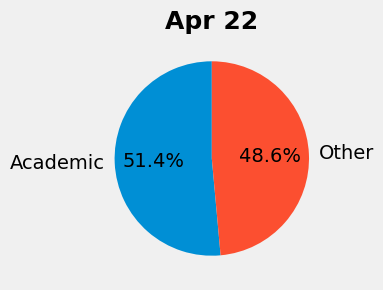

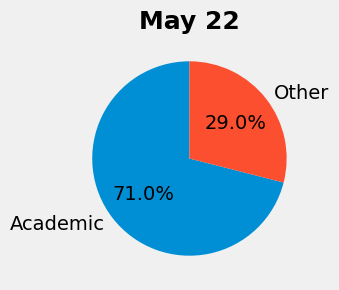

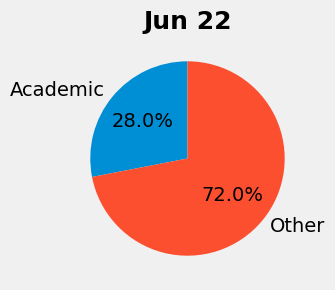

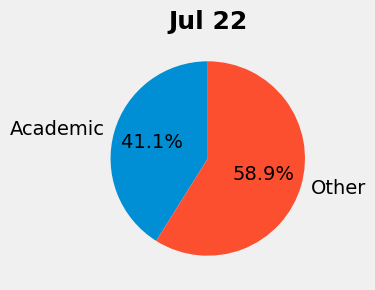

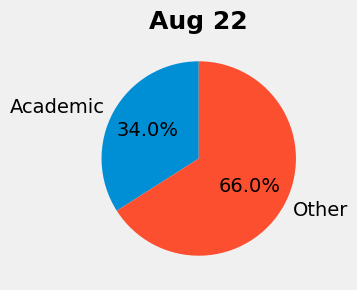

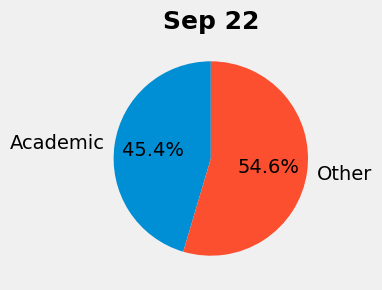

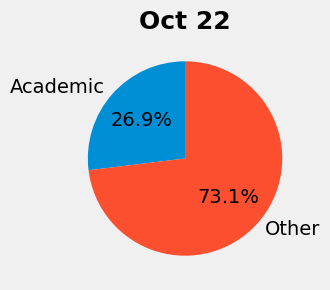

In [11]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Daily closing prices", fontsize=18, y=0.95)

data_pre = df_monthly_acad_other.groupby(['Date', 'Project'], sort=False, as_index=False).sum()
months = data_pre['Date'].unique()
for date in months:
    data = np.array(data_pre[data_pre.Date == date]['Duration (hrs)'])
    labels = np.array(data_pre[data_pre.Date == date].Project)
    fig = plt.figure(figsize=(4, 3), dpi=100)
    plt.pie(x=data, labels=labels, startangle=90, autopct='%1.1f%%', textprops={'fontsize': 14})
    plt.title(date, fontweight='bold', fontsize=18)
    plt.show()

### 🔴 Monthly Breakdown (Individual Projects)

In [12]:
df_monthly

,Date,Project,Duration (hrs)
0,Jan 19,University,70.000000
1,Jan 19,Notes,11.000000
2,Jan 19,Data Science,0.000000
3,Jan 19,To-Do,44.000000
4,Jan 19,Piano,9.000000
...,...,...,...
267,Sep 22,To-Do,78.500000
268,Sep 22,Piano,0.000000
269,Sep 22,Workout,2.000000
270,Oct 22,Data Science,0.983889


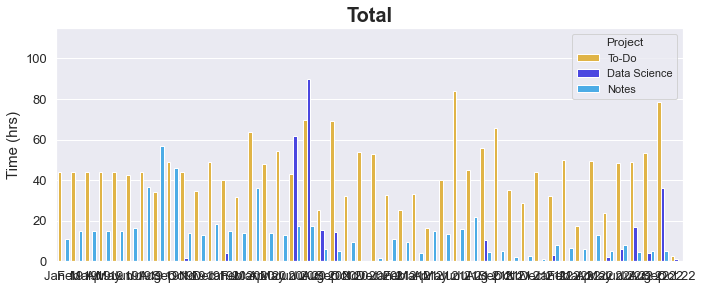

In [13]:
figsize=(10,4)
legendsize=10
title_size=20
bar_label_size=17
x_tick_size = 13
y_tick_size = 13

sns.set_theme(style="darkgrid")
plt.figure(figsize=figsize)

# Set your custom color palette https://htmlcolorcodes.com/
unique_projects = df_monthly.Project.unique().shape[0]

colors = {'To-Do': "#FABF2D", 
          'Notes': "#33B2FF", 
          'Data Science': "#332DFA", 
          'Piano': '0FB528', 
          'Workout': 'C01E05'}

hue_order = ['To-Do', 'Data Science', 'Notes']


ax = sns.barplot(x='Date', y='Duration (hrs)', data=df_monthly, hue='Project', ci=None, palette=colors, hue_order=hue_order)
plt.xlabel('')
plt.ylabel('Time (hrs)', fontsize=15)
plt.title('Total', fontsize=title_size, fontweight='bold')
#ax.bar_label(ax.containers[0], fontsize=bar_label_size, fmt='%.0f', fontweight='bold', label_type='center') # Show values above bars
plt.ylim([0, df_monthly['Duration (hrs)'].max() + 3])     # Expand y axis range for visibility
ax.xaxis.set_tick_params(labelsize=x_tick_size)                         # Enlarge x ticks
ax.yaxis.set_tick_params(labelsize=y_tick_size)                         # Enlarge x ticks

plt.show()

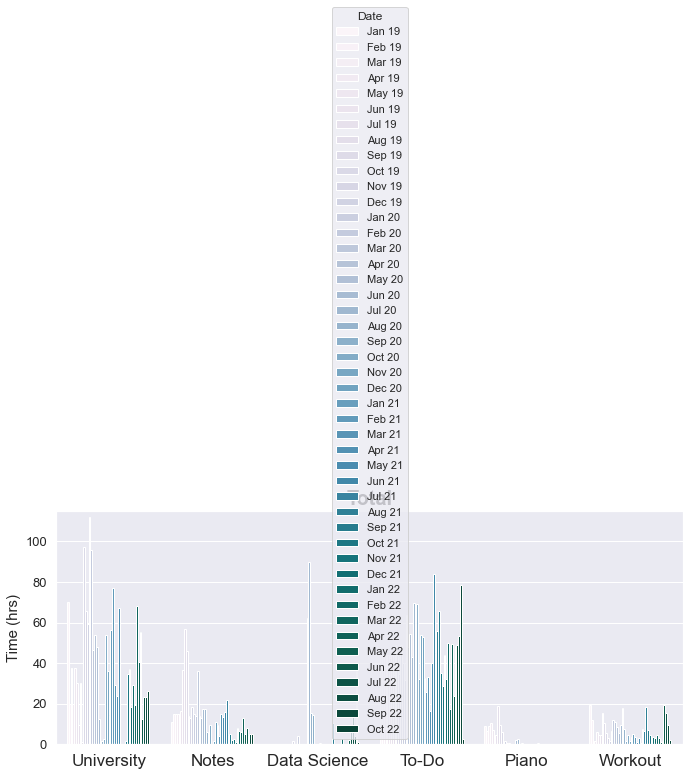

In [14]:
## figsize=(12,4)
legendsize=10
title_size=20
bar_label_size=17

sns.set_theme(style="darkgrid")
plt.figure(figsize=figsize)

ax = sns.barplot(x='Project', y='Duration (hrs)', data=df_monthly, hue='Date', ci=None, palette='PuBuGn')
plt.xlabel('')
plt.ylabel('Time (hrs)', fontsize=15)
plt.title('Total', fontsize=title_size, fontweight='bold')
#ax.bar_label(ax.containers[0], fontsize=bar_label_size, fmt='%.0f', fontweight='bold', label_type='center') # Show values above bars
plt.ylim([0, df_monthly['Duration (hrs)'].max() + 3])     # Expand y axis range for visibility
ax.xaxis.set_tick_params(labelsize=17)                         # Enlarge x ticks
ax.yaxis.set_tick_params(labelsize=13)                         # Enlarge x ticks

plt.show()

### 🔴 Annual Breakdown